You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

Use Pandas to import the data from epa-sea-level.csv.
Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axix.
Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

Data Source
[Global Average Absolute Sea Level Change](https://datahub.io/core/sea-level-rise "Download"), 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.

___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv('D:\\Data\\epa-sea-level.csv')
pd.set_option("display.max_rows", None)
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
5,1885,0.531496,-0.330709,1.393701,NaN
6,1886,0.437008,-0.381890,1.255906,NaN
7,1887,0.216535,-0.602362,1.035433,NaN
8,1888,0.299213,-0.519685,1.118110,NaN
9,1889,0.362205,-0.456693,1.181102,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


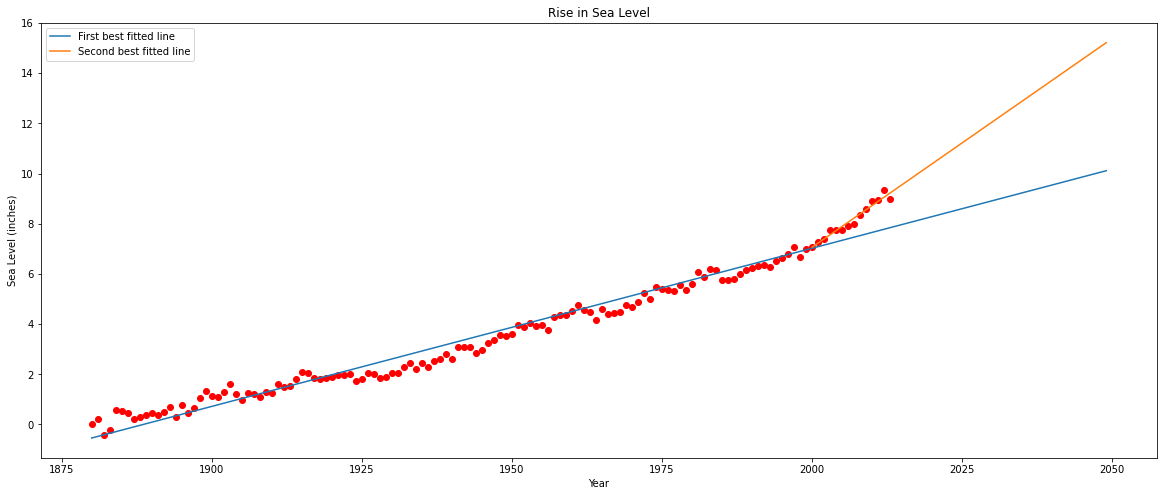

In [18]:
def draw_plot():
    x = df['Year']
    y = df['CSIRO Adjusted Sea Level']
    fig = plt.figure(figsize = (20, 8))
    plt.scatter(x, y, color='red')
    reg1 = linregress(x, y)
    x_pred = pd.Series([i for i in range(1880, 2050)])
    y_pred = reg1.slope*x_pred + reg1.intercept
    plt.plot(x_pred, y_pred, label= 'First best fitted line')
    new_df = df.loc[df['Year'] >= 2000]
    x1 = new_df['Year']
    y1 = new_df['CSIRO Adjusted Sea Level']
    reg2 = linregress(x1, y1)
    x_pred2 = pd.Series([i for i in range(2000, 2050)])
    y_pred2 = reg2.slope*x_pred2 + reg2.intercept
    plt.plot(x_pred2, y_pred2, label= 'Second best fitted line')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.savefig('sea_level_plot.png')
    return plt.gca()
draw_plot();